In [16]:
#Analyzing selling price of used cars using Python


#Now-a-days, with the technological advancement, Techniques like Machine Learning, etc are being used on a large scale in many organisations. These models usually work with a set of predefined data-points available in the form of datasets. These datasets contain the past/previous information on a specific domain. Organising these datapoints before it is fed to the model is very important. This is where we use Data Analysis. If the data fed to the machine learning model is not well organised, it gives out false or undesired output. This can cause major losses to the organisation. Hence making use of proper data analysis is very important.

#About Dataset:

#The data that we are going to use in this example is about cars. Specifically containing various information datapoints about the used cars, like their price, color, etc. Here we need to understand that simply collecting data isn’t enough. Raw data isn’t useful. Here data analysis plays a vital role in unlocking the information that we require and to gain new insights into this raw data.

#Consider this scenario, our friend, Otis, wants to sell his car. But he doesn’t know how much should he sell his car for! He wants to maximize the profit but he also wants it to be sold for a reasonable price for someone who would want to own it. So here, us, being a data scientist, we can help our friend Otis.

#Let’s think like data scientists and clearly define some of his problems: For example, is there data on the prices of other cars and their characteristics? What features of cars affect their prices? Colour? Brand? Does horsepower also affect the selling price, or perhaps, something else?

#As a data analyst or data scientist, these are some of the questions we can start thinking about. To answer these questions, we’re going to need some data. But this data is in raw form. Hence we need to analyze it first. The data is available in the form of .csv/.data format with us




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df = pd.read_csv('imports.85.csv')
df.head()

#defining headers for the dataset
headers = ["symboling", "normalized-losses", "make",
		"fuel-type", "aspiration","num-of-doors",
		"body-style","drive-wheels", "engine-location",
		"wheel-base","length", "width","height", "curb-weight",
		"engine-type","num-of-cylinders", "engine-size",
		"fuel-system","bore","stroke", "compression-ratio",
		"horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
df.head()

# Finding the missing value if any

data = df

# Finding the missing values
data.isna().any()

# Finding if missing values
data.isnull().any()





symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [17]:
#Converting mpg to L/100km and checking the data type of each column.
# converting mpg to L / 100km
data['city-mpg'] = 235 / df['city-mpg']
data.rename(columns = {'city_mpg': "city-L / 100km"}, inplace = True)

print(data.columns)

# checking the data type of each column
data.dtypes


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                 object
dtype: object

In [39]:
#Above, price is of object type(string), it should be int or float, so we need to change it
data.price.unique()






array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',
     

In [44]:
data = data[data.price != '?']

data['price'] = data['price'].astype(int)

data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                  int32
dtype: object

In [45]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                  int32
dtype: object

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


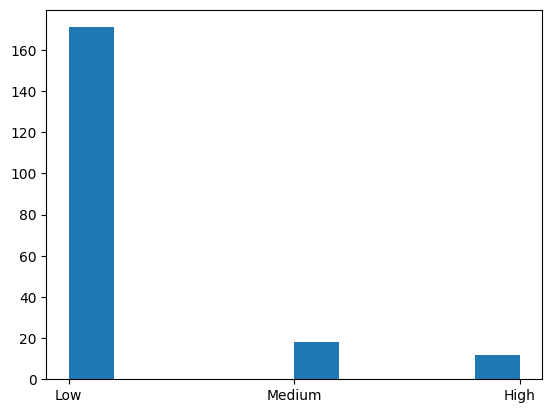

In [49]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins,
							labels = group_names,
							include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()


In [50]:
# categorical to numerical variables
pd.get_dummies(data['fuel-type']).head()

# descriptive analysis
# NaN are skipped
data.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,9.944145,30.686567,13207.129353
std,1.254802,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,2.534599,6.815150,7947.066342
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,9.791667,30.000000,10295.000000
75%,2.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


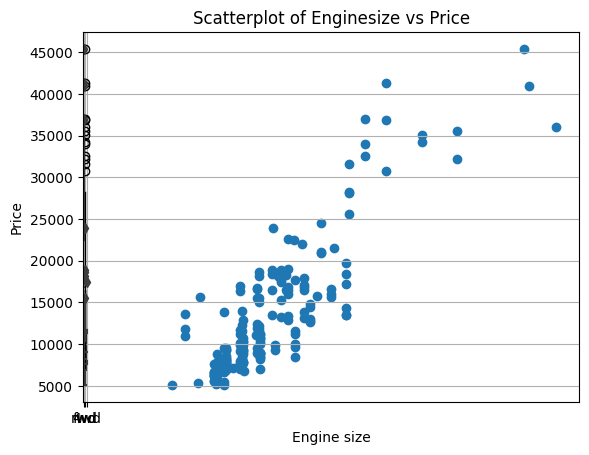

In [51]:
# examples of box plot
plt.boxplot(data['price'])

# by using seaborn
sns.boxplot(x ='drive-wheels', y ='price', data = data)

# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()


In [52]:
# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],
						as_index = False).mean()

data_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


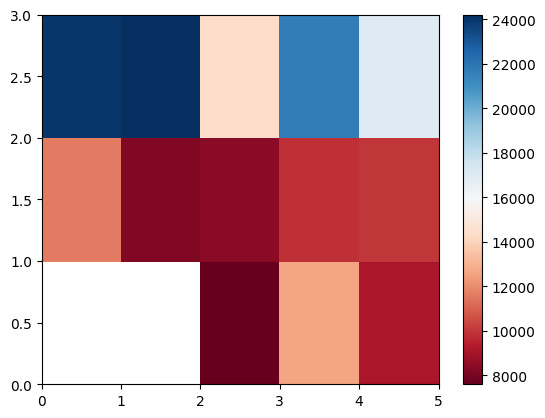

In [53]:
# pivot method
data_pivot = data_grp.pivot(index = 'drive-wheels',
							columns = 'body-style')
data_pivot

# heatmap for visualizing data
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()


F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53007.3849834229)

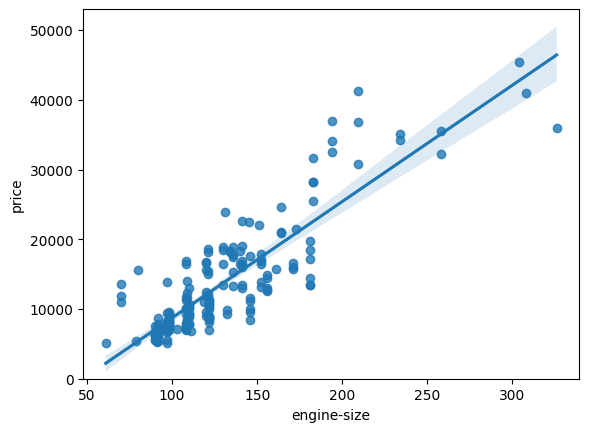

In [54]:
# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by
# variation within sample group
# p-value = confidence degree
data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
							grouped_annova.get_group('honda')['price'],
							grouped_annova.get_group('subaru')['price']
									)
print(annova_results_l)

# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value

# Correlation- measures dependency, not causation
sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0, )
